<a href="https://colab.research.google.com/github/inoueshinji8/PythonStudy/blob/main/Torch_Semantic_Segmentation__test2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

https://note-tech.com/python_segmentation/

および<br>
https://github.com/qubvel/segmentation_models.pytorch/blob/master/examples/cars%20segmentation%20(camvid).ipynb

を参考にする<br>
また例によって、ランタイム→ランタイムのタイプを変更→GPUにしよう

In [1]:
!nvidia-smi
#最初は強力なTesla T4で良かった

Sun Apr 17 13:12:02 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   33C    P8     9W /  70W |      0MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [2]:
!pip install cython
!pip install opencv-python pillow pycocotools matplotlib
!pip3 install torch==1.4.0 torchvision torchaudio --extra-index-url https://download.pytorch.org/whl/cu113
#torchtextがまた取れなかった。これはtorch=1.10が必須なのだと
#またここでopencvをまた取ってしまったがopencv-python==4.4.0.46で最初からやれば良かった



Looking in indexes: https://pypi.org/simple, https://download.pytorch.org/whl/cu113
     |████████████████████████████████| 753.4 MB 7.7 kB/s 
     |████████████████████████████████| 22.3 MB 1.3 MB/s 
     |████████████████████████████████| 21.0 MB 1.2 MB/s 
     |████████████████████████████████| 24.5 MB 1.4 MB/s 
     |████████████████████████████████| 23.2 MB 90.4 MB/s 
     |████████████████████████████████| 24.6 MB 1.3 MB/s 
     |████████████████████████████████| 23.3 MB 1.3 MB/s 
     |████████████████████████████████| 24.6 MB 1.4 MB/s 
     |████████████████████████████████| 23.3 MB 1.5 MB/s 
     |████████████████████████████████| 21.8 MB 95.0 MB/s 
     |████████████████████████████████| 22.1 MB 1.2 MB/s 
     |████████████████████████████████| 22.1 MB 1.1 MB/s 
     |████████████████████████████████| 17.4 MB 624 kB/s 
     |████████████████████████████████| 17.3 MB 36 kB/s 
     |████████████████████████████████| 12.8 MB 53.9 MB/s 
     |████████████████████████████████| 12.

In [3]:
!pip install -U segmentation-models-pytorch albumentations



     |████████████████████████████████| 88 kB 5.4 MB/s 
     |████████████████████████████████| 102 kB 59.5 MB/s 
     |████████████████████████████████| 376 kB 63.3 MB/s 
     |████████████████████████████████| 58 kB 8.5 MB/s 
     |████████████████████████████████| 47.8 MB 2.0 MB/s 
  Created wheel for efficientnet-pytorch: filename=efficientnet_pytorch-0.6.3-py3-none-any.whl size=12421 sha256=3076862b01aabfe673bc7cfb2655fa1a1ac0976a729881cf0e28fb4367737384
  Stored in directory: /root/.cache/pip/wheels/90/6b/0c/f0ad36d00310e65390b0d4c9218ae6250ac579c92540c9097a
  Created wheel for pretrainedmodels: filename=pretrainedmodels-0.7.4-py3-none-any.whl size=60965 sha256=4db6afa17c91649f4ceb0df88fc2a24b7cc9cde454a77f793238f90722602aef
  Stored in directory: /root/.cache/pip/wheels/ed/27/e8/9543d42de2740d3544db96aefef63bda3f2c1761b3334f4873
Successfully built efficientnet-pytorch pretrainedmodels
  Attempting uninstall: albumentations
    Found existing installation: albumentations 0.1.12
 

In [4]:
from google.colab import drive
drive.mount('/content/drive')
#とにかくマウントが大事

Mounted at /content/drive


In [5]:
import os
os.chdir('/content/drive/MyDrive/testdrive1') # パスは任意に変更
#この前のと同じところにした

In [6]:
! pip uninstall opencv-python
#! pip install opencv-python==4.4.0.46 だと出来たのだが、やらなければよかった

Found existing installation: opencv-python 4.1.2.30
Uninstalling opencv-python-4.1.2.30:
  Would remove:
    /usr/local/lib/python3.7/dist-packages/cv2/*
    /usr/local/lib/python3.7/dist-packages/opencv_python-4.1.2.30.dist-info/*
  Would not remove (might be manually added):
    /usr/local/lib/python3.7/dist-packages/cv2/config-3.py
    /usr/local/lib/python3.7/dist-packages/cv2/config.py
    /usr/local/lib/python3.7/dist-packages/cv2/cv2.abi3.so
    /usr/local/lib/python3.7/dist-packages/cv2/gapi/__init__.py
    /usr/local/lib/python3.7/dist-packages/cv2/load_config_py2.py
    /usr/local/lib/python3.7/dist-packages/cv2/load_config_py3.py
    /usr/local/lib/python3.7/dist-packages/cv2/mat_wrapper/__init__.py
    /usr/local/lib/python3.7/dist-packages/cv2/misc/__init__.py
    /usr/local/lib/python3.7/dist-packages/cv2/misc/version.py
    /usr/local/lib/python3.7/dist-packages/cv2/utils/__init__.py
    /usr/local/lib/python3.7/dist-packages/cv2/version.py
Proceed (y/n)? y
  Successfull

In [8]:
! pip install opencv-python==4.4.0.46
#opencvの入れ直し成功

     |████████████████████████████████| 49.5 MB 1.2 MB/s 


In [9]:
import os
os.environ['CUDA_VISIBLE_DEVICES'] = '0'

import numpy as np
import cv2
import matplotlib.pyplot as plt

import torch
from torch.utils.data import DataLoader
from torch.utils.data import Dataset as BaseDataset

import segmentation_models_pytorch as smp
import albumentations as albu

In [10]:
DATA_DIR = './data/CamVid/'

# load repo with data if it is not exists
if not os.path.exists(DATA_DIR):
    print('Loading data...')
    os.system('git clone https://github.com/alexgkendall/SegNet-Tutorial ./data')
    print('Done!')

x_train_dir = os.path.join(DATA_DIR, 'train')
y_train_dir = os.path.join(DATA_DIR, 'trainannot')

x_valid_dir = os.path.join(DATA_DIR, 'val')
y_valid_dir = os.path.join(DATA_DIR, 'valannot')

x_test_dir = os.path.join(DATA_DIR, 'test')
y_test_dir = os.path.join(DATA_DIR, 'testannot')
#今度はこの辺がちゃんと出来ていてよかった
#なおインストールに結構かかった

Loading data...
Done!


In [18]:
def get_training_augmentation():
    train_transform = [
        albu.PadIfNeeded(min_height=320, min_width=320, always_apply=True, border_mode=0),
        albu.RandomCrop(height=320, width=320, always_apply=True),
    ]
    return albu.Compose(train_transform)

def get_validation_augmentation():
    """画像のshapeが32で割り切れるようにPaddingするための関数"""
    test_transform = [
        albu.PadIfNeeded(384, 480)
    ]
    return albu.Compose(test_transform)

def to_tensor(x, **kwargs):
    return x.transpose(2, 0, 1).astype('float32')

def get_preprocessing(preprocessing_fn):
    """Construct preprocessing transform    
    Args:
        preprocessing_fn (callbale): data normalization function 
            (can be specific for each pretrained neural network)
    Return:
        transform: albumentations.Compose    
    """
    
    _transform = [
        albu.Lambda(image=preprocessing_fn),
        albu.Lambda(image=to_tensor, mask=to_tensor),
    ]
    return albu.Compose(_transform)
    #このpreprocessing_fnについて後で突っ込まれた

In [12]:
# 可視化用の関数
def visualize(**images):
    """PLot images in one row."""
    n = len(images)
    plt.figure(figsize=(16, 5))
    for i, (name, image) in enumerate(images.items()):
        plt.subplot(1, n, i + 1)
        plt.xticks([])
        plt.yticks([])
        plt.title(' '.join(name.split('_')).title())
        plt.imshow(image)
    plt.show()

In [22]:
# 1. torch.utils.data.Datasetを継承したDataset classを定義
class Dataset(torch.utils.data.Dataset):
    CLASSES = ['sky', 'building', 'pole', 'road', 'pavement', 
               'tree', 'signsymbol', 'fence', 'car', 
               'pedestrian', 'bicyclist', 'unlabelled']
    
    def __init__(
            self, 
            images_dir, # 画像のPath
            masks_dir, # マスク画像のPath
            classes=None, # 推論対象のクラス
            augmentation=None, # augmentation用関数
            preprocessing=None, # 前処理用関数
    ):
        self.ids = os.listdir(images_dir)
        self.images_fps = [os.path.join(images_dir, image_id) for image_id in self.ids]
        self.masks_fps = [os.path.join(masks_dir, image_id) for image_id in self.ids]
        
        # クラス名の文字列('car', 'sky'など)をIDに変換
        self.class_values = [self.CLASSES.index(cls.lower()) for cls in classes]
        
        self.augmentation = augmentation
        self.preprocessing = preprocessing

        # 3. 学習用データ(image)と特徴(mask)を返す__getitem__メソッドを作成
    def __getitem__(self, i):
        
        # データの読み込み
        image = cv2.imread(self.images_fps[i])
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        mask = cv2.imread(self.masks_fps[i], 0)
        
        # 学習対象のクラス(例えば、'car')のみを抽出
        masks = [(mask == v) for v in self.class_values]
        mask = np.stack(masks, axis=-1).astype('float')
        
        # augmentation関数の適用
        if self.augmentation:
            sample = self.augmentation(image=image, mask=mask)
            image, mask = sample['image'], sample['mask']
        
        # 前処理関数の適用
        if self.preprocessing:
            sample = self.preprocessing(image=image, mask=mask)
            image, mask = sample['image'], sample['mask']
            
        return image, mask
    # 4. データセットの長さを返す__len__を作成
    def __len__(self):
        return len(self.ids)
    def len(self):# 4_1. データセットの長さを返すlenを作成。内部の形式に合わせた
        return len(self.ids)
    #
    

    



In [21]:
!ls

data  Training_Program_104_208


In [23]:
from torch.utils.data import DataLoader

ENCODER = 'se_resnext50_32x4d'
ENCODER_WEIGHTS = 'imagenet'
CLASSES = ['car']
ACTIVATION = 'sigmoid' # could be None for logits or 'softmax2d' for multiclass segmentation
DEVICE = 'cuda'

preprocessing_fn = smp.encoders.get_preprocessing_fn(ENCODER, ENCODER_WEIGHTS)

#このタイミングで、上のpreprocessing_fnなどを定義していないと下で動かない

# データセットのインスタンスを作成
train_dataset = Dataset(
    x_train_dir, 
    y_train_dir, 
    augmentation=get_training_augmentation(), 
    preprocessing=get_preprocessing(preprocessing_fn),
    classes=CLASSES,
)

# データローダーの作成
train_loader = DataLoader(train_dataset, batch_size=8, shuffle=True, num_workers=12)

#ここでこれも作成すべき
valid_dataset = Dataset(
    x_valid_dir, 
    y_valid_dir, 
    augmentation=get_validation_augmentation(), 
    preprocessing=get_preprocessing(preprocessing_fn),
    classes=CLASSES,
)
#ここでこれも作成すべき
valid_loader = DataLoader(valid_dataset, batch_size=1, shuffle=False, num_workers=4)

In [24]:
# SMPを用いて学習済みモデルを取得(アーキテクチャはFPN)
model = smp.FPN(
    encoder_name=ENCODER, 
    encoder_weights=ENCODER_WEIGHTS, 
    classes=len(CLASSES), 
    activation=ACTIVATION,
)

Downloading: "http://data.lip6.fr/cadene/pretrainedmodels/se_resnext50_32x4d-a260b3a4.pth" to /root/.cache/torch/checkpoints/se_resnext50_32x4d-a260b3a4.pth


  0%|          | 0.00/105M [00:00<?, ?B/s]

In [25]:
print(model)

FPN(
  (encoder): SENetEncoder(
    (layer0): Sequential(
      (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu1): ReLU(inplace=True)
      (pool): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=True)
    )
    (layer1): Sequential(
      (0): SEResNeXtBottleneck(
        (conv1): Conv2d(64, 128, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn1): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv2): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), groups=32, bias=False)
        (bn2): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv3): Conv2d(128, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu)

In [26]:
loss = smp.utils.losses.DiceLoss() 

# 評価関数
metrics = [
    smp.utils.metrics.IoU(threshold=0.5),
]

# 最適化関数
optimizer = torch.optim.Adam([ 
    dict(params=model.parameters(), lr=0.0001),
])

In [29]:
'''
valid_dataset = Dataset(
    x_valid_dir, 
    y_valid_dir, 
    augmentation=get_validation_augmentation(), 
    preprocessing=get_preprocessing(preprocessing_fn),
    classes=CLASSES,
)
#ここは上の分かり易い所で再定義した
valid_loader = DataLoader(valid_dataset, batch_size=1, shuffle=False, num_workers=4)
'''

# SMPに用意されているシンプルなループ関数(Train用)
train_epoch = smp.utils.train.TrainEpoch(
    model, 
    loss=loss, 
    metrics=metrics, 
    optimizer=optimizer,
    device=DEVICE,
    verbose=True,
)

# SMPに用意されているシンプルなループ関数(Validation用)
valid_epoch = smp.utils.train.ValidEpoch(
    model, 
    loss=loss, 
    metrics=metrics, 
    device=DEVICE,
    verbose=True,
)

# 学習ループの実行
n_epoch = 40 # エポック数
max_score = 0
for i in range(0, n_epoch):    
    print('\nEpoch: {}'.format(i))
    train_logs = train_epoch.run(train_loader)
    valid_logs = valid_epoch.run(valid_loader)
    
    # 評価関数の値が更新されたらモデルを保存
    if max_score < valid_logs['iou_score']:
        max_score = valid_logs['iou_score']
        torch.save(model, './best_model.pth')
        print('Model saved!')

    # エポック25以降は学習率(learning rate)を下げる      
    if i == 25:
        optimizer.param_groups[0]['lr'] = 1e-5
        print('Decrease decoder learning rate to 1e-5!')


Epoch: 0
valid: 100%|██████████| 101/101 [00:04<00:00, 22.58it/s, dice_loss - 0.3148, iou_score - 0.6017]
Model saved!

Epoch: 1
valid: 100%|██████████| 101/101 [00:04<00:00, 23.05it/s, dice_loss - 0.2696, iou_score - 0.6528]
Model saved!

Epoch: 2
valid: 100%|██████████| 101/101 [00:04<00:00, 22.92it/s, dice_loss - 0.2577, iou_score - 0.6598]
Model saved!

Epoch: 3
valid: 100%|██████████| 101/101 [00:04<00:00, 23.10it/s, dice_loss - 0.219, iou_score - 0.704]
Model saved!

Epoch: 4
valid: 100%|██████████| 101/101 [00:04<00:00, 23.12it/s, dice_loss - 0.2634, iou_score - 0.6461]

Epoch: 5
valid: 100%|██████████| 101/101 [00:04<00:00, 23.15it/s, dice_loss - 0.2175, iou_score - 0.7017]

Epoch: 6
valid: 100%|██████████| 101/101 [00:04<00:00, 22.99it/s, dice_loss - 0.2337, iou_score - 0.6799]

Epoch: 7
valid: 100%|██████████| 101/101 [00:04<00:00, 23.42it/s, dice_loss - 0.1971, iou_score - 0.7264]
Model saved!

Epoch: 8
valid: 100%|██████████| 101/101 [00:04<00:00, 22.88it/s, dice_loss - 0.

In [30]:
# 可視化用の画像を取得するデータセットを作成(Augmentationなし)
test_dataset_vis = Dataset(
    x_test_dir, y_test_dir, 
    classes=CLASSES,
)

# 可視化用の関数
def visualize(**images):
    """PLot images in one row."""
    n = len(images)
    plt.figure(figsize=(16, 5))
    for i, (name, image) in enumerate(images.items()):
        plt.subplot(1, n, i + 1)
        plt.xticks([])
        plt.yticks([])
        plt.title(' '.join(name.split('_')).title())
        plt.imshow(image)
    plt.show()

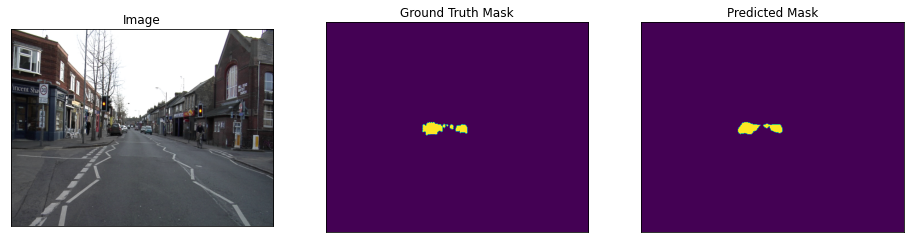

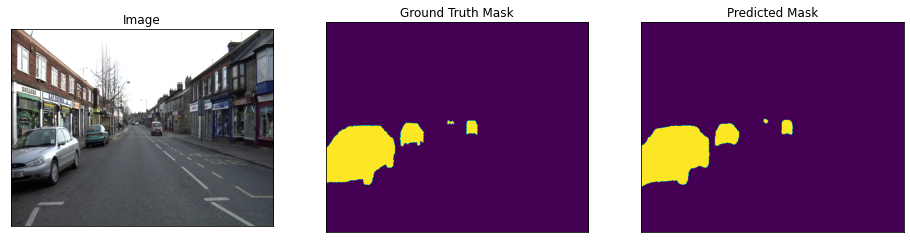

In [31]:
# 1. 学習モデルの読み込み
best_model = torch.load('./best_model.pth')

# 2. 推論用のデータセット、データローダーの作成
test_dataset = Dataset(
    x_test_dir, 
    y_test_dir, 
    augmentation=get_validation_augmentation(), 
    preprocessing=get_preprocessing(preprocessing_fn),
    classes=CLASSES,
)
test_dataloader = DataLoader(test_dataset)

n_data = 2 # 確認するデータの数
for i in range(n_data):
    n = np.random.choice(len(test_dataset))

    # 3. 新規データの取得
    image_vis = test_dataset_vis[n][0].astype('uint8')
    image, gt_mask = test_dataset[n]
    gt_mask = gt_mask.squeeze()
    
    # 3. 新規データの推論
    x_tensor = torch.from_numpy(image).to(DEVICE).unsqueeze(0)
    pr_mask = best_model.predict(x_tensor)
    pr_mask = (pr_mask.squeeze().cpu().numpy().round())
        
    # 4. 可視化
    visualize(
        image=image_vis, 
        ground_truth_mask=gt_mask, 
        predicted_mask=pr_mask
    )
    #お陰様で、やっとセマンテックセグメンテーションができた！